## [현실 문제 상황 제시]

- 옥지 : 빵빵아 나 이제 재테크라는 것을 해보려고해. 우리도 결혼해야지.
- 빵빵이 : 옥지야 가만히 있는게 버는거야....
- 옥지 :
<img src="https://drive.google.com/uc?id=1XS-979oTCL7qoYGzl1baiHpPDwBHw-u_" width=400 />
- 빵빵이 :
<img src="https://drive.google.com/uc?id=1uJjgo-03Fu9ryQGneCTF5hPWPtqrZfwZ" width=400 />

> 빵빵이는 옥지의 투자를 말리지 못하고 결국 손실이 안생기도록 정보를 제공하는 방향으로 목표를 변경했다. <br>
> 빵빵이는 우선 뉴스에서 가장 많이 언급되는 키워드가 무엇인지 확인하고자 한다. <br>


## [빵빵이의 문제해결 시나리오]

### 1. 문제 정의 (Problem Definition)
- 가장 큰 문제: 옥지가 '감'이 아닌 '데이터'에 기반해 투자 결정을 내리도록 도와야 한다. (최소한 큰 손실은 막아야 한다!)

- 제약 조건: 빵빵이는 투자 전문가가 아니므로, 특정 종목을 "사라" 또는 "팔아라" 하고 직접 추천할 수는 없다. 객관적인 정보를 제공하는 역할에만 집중해야 한다.

- 범위 좁히기: 세상의 모든 투자 정보를 다룰 수는 없다. 우선 현재 경제를 분석하는 것을 우선으로 한다.

### 2. 무엇을, 어디서 찾을 것인가? (What & Where to Find)
- 무엇을(What): 특정 종목의 '가격' 정보만으로는 시장의 '흐름'을 알 수 없다. 지금 시장 참여자들이 무엇에 가장 큰 관심을 보이는지 알아야 한다. 즉, 뉴스 기사에서 **'가장 많이 언급되는 키워드'**가 바로 시장의 트렌드를 보여주는 핵심 데이터다.

- 어디서(Where): 신뢰할 수 있는 대량의 뉴스 데이터를 어디서 구할 수 있을까? 개인이 포털 사이트를 일일이 뒤지는 것은 비효율적이다. → 한국언론진흥재단의 빅카인즈(BIG KINDS). 언론사 뉴스를 모아 둔 국가 공인 아카이브이므로 데이터의 신뢰도가 높고, 원하는 조건으로 검색하여 대량의 데이터를 다운로드할 수 있다.

### 3. 어떻게 해결할 것인가? (How to Solve)
- 해결 계획 수립:

  1. (A) 먼저, 빅카인즈에 접속하여 '경제' 카테고리의 뉴스 기사 데이터를 Excel/CSV 파일로 다운로드한다.

  2. (B) 그 다음, 다운로드한 파일에서 분석에 필요한 '기사 제목' 데이터만 추출한다.

  3. (C) 이어서, 1교시에서 배운 토큰화, 정규 표현식, 불용어 처리 기술로 수만 개의 단어를 깨끗하게 정제한다.

  4. (D) 마지막으로, 2교시의 BoW 개념을 응용하여 전체 단어의 빈도를 계산하고, 가장 많이 등장한 핵심 키워드 TOP을 뽑아낸다. 이 결과를 차트로 시각화하여 옥지가 한눈에 시장의 흐름을 파악할 수 있도록 전달한다.

- 실행 도구 선택:

  - (A) 과정은 빅카인즈 사이트에서 수동으로 진행한다.

  - (B), (C), (D) 과정은 사람이 직접 하면 며칠이 걸릴 작업이다. 파이썬 Pandas, KoNLPy, WordCloud 라이브러리를 사용해 전체 과정을 자동화한다.

In [ ]:
!pip install gdown -q

In [ ]:
import pandas as pd
from google.colab import drive

# 1. 구글 드라이브를 '/content/drive' 폴더에 연결(마운트)
drive.mount('/content/drive')

# 2. '/content/drive/MyDrive/'로 시작하는 전체 경로로 수정
file_path = '/content/drive/MyDrive/수업/데이터 분석/회사 내부 강의/3일차/data/news_data.xlsx'

# 3. pandas로 엑셀 파일 읽기
df = pd.read_excel(file_path)
# 데이터 확인
display(df['제목'].head())

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


/usr/local/lib/python3.11/dist-packages/openpyxl/styles/stylesheet.py:237: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


,제목
0,‘마피’ 떴던 광명 아파트 보류지 1원도 안 깎고 다시 나왔다 [부동산360]
1,설탕에서 K콘텐츠까지 CJ의 사업보국 70년
2,'억대 연봉' 은행원은 좋겠네 퇴직 후에도 연봉 4300만원 준다는 '이곳'
3,공공임대 살면서 억대 자동차 몬다? 한국 안되는데 일본 깜짝 '반전'
4,"""아침부터 오픈런 미어터지겠네"" 통닭 한 마리 3500원에 쏘는 '이곳'"


In [ ]:
!pip install konlpy

형태소 분석 적용

In [ ]:
from konlpy.tag import Okt
import pandas as pd

# Okt 형태소 분석기 객체 생성
okt = Okt()

# 뉴스 제목 조회
title = df["제목"]

# 분석 결과를 저장할 리스트
tokenized_titles = []

# --- 100건의 제목에 대해 형태소 분석 진행 ---
# .head(100)을 사용해 처음 100개의 데이터만 선택
for title_text in title.head(100):
    # okt.nouns()를 사용해 문장에서 명사만 추출
    nouns = okt.nouns(title_text)
    tokenized_titles.append(nouns)

# 상위 5개 결과 확인
for i, tokens in enumerate(tokenized_titles):
    print(f"{i+1}번째 제목 명사: {tokens}")

1번째 제목 명사: ['마피', '광명', '아파트', '보류', '안', '다시', '부동산']
2번째 제목 명사: ['설탕', '콘텐츠', '의', '사업', '보국']
3번째 제목 명사: ['억대', '연봉', '은행원', '퇴직', '후', '연봉', '곳']
4번째 제목 명사: ['임대', '억대', '자동차', '몬다', '한국', '일본', '깜짝', '반전']
5번째 제목 명사: ['아침', '오픈', '런', '통닭', '마리', '곳']
6번째 제목 명사: ['홍콩', '행정', '장관', '투자', '유치', '것']
7번째 제목 명사: ['퇴직', '후', '인생', '막', '취업', '창업', '이', '금융', '사']
8번째 제목 명사: ['트럼프', '다시', '불', '탈', '중앙', '금융']
9번째 제목 명사: ['해운', '상반기', '영업', '익']
10번째 제목 명사: ['소매', '판매', '산업', '생산', '장치', '밑', '계절', '요인', '부진']
11번째 제목 명사: ['전세계', '전략', '광물', '개', '특정', '국', '편중', '공급', '불균형', '대비', '필요']
12번째 제목 명사: ['워런', '버핏', '올해', '유나이티드헬스', '매수']
13번째 제목 명사: ['삼성', '제', '은행원', '연봉', '상반기']
14번째 제목 명사: ['전남도', '미래', '성장', '처', '스타트업', '연구개발', '실증', '지원']
15번째 제목 명사: ['폭우', '폭염', '겹', '생산', '소비', '성장', '세', '둔화']
16번째 제목 명사: ['블랙', '핑크', '아이돌', '그룹', '브랜드', '평판', '위', '위', '위', '아이브']
17번째 제목 명사: ['전액', '현금', '아파트', '클럽', '우르르']
18번째 제목 명사: ['강판', '상계관세', '폭', '인상']
19번째 제목 명사: ['포토', '제', '주년', '광복절

불용어 정리

In [ ]:
# 직접 정의한 불용어 리스트
stopwords = ['안', '다시', '의', '후', '곳', '것', '위', '이', '막', '사', '불', '탈', '익', '밑', '개', '국', '제', '피', '구', '해', '밖', '더', '때', '새', '자', '도', '정', '분', '중', '율', '세', '로', '보', '인', '등', '리', '년', '부', '팀', '케', '재', '시', '수', '친', '총']


# 불용어를 제외한 단어들만 저장할 리스트
cleaned_titles = []
for title in tokenized_titles:
    # 리스트 컴프리헨션을 사용하여 간결하게 처리
    cleaned_word = [word for word in title if word not in stopwords]
    cleaned_titles.append(cleaned_word)

# --- 결과 비교 (첫 번째 제목) ---
print("불용어 제거 전:", tokenized_titles[0 : 3])
print("불용어 제거 후:", cleaned_titles[0:3])

불용어 제거 전: [['마피', '광명', '아파트', '보류', '안', '다시', '부동산'], ['설탕', '콘텐츠', '의', '사업', '보국'], ['억대', '연봉', '은행원', '퇴직', '후', '연봉', '곳']]
불용어 제거 후: [['마피', '광명', '아파트', '보류', '부동산'], ['설탕', '콘텐츠', '사업', '보국'], ['억대', '연봉', '은행원', '퇴직', '연봉']]


### 단어 빈도확인


In [ ]:
from collections import Counter

# 2차원 리스트(cleaned_titles)를 1차원 리스트로 변환
all_words = sum(cleaned_titles, [])
# Counter를 사용해 단어 빈도수 계산
word_counts = Counter(all_words)

# 가장 많이 나타난 단어 20개 출력
print("\n--- 전체 제목에서 가장 많이 나온 명사 TOP 20 ---")
for word, count in word_counts.most_common(20):
    print(f"{word}: {count}회")


--- 전체 제목에서 가장 많이 나온 명사 TOP 20 ---
상반기: 7회
사업: 6회
성장: 6회
트럼프: 5회
아파트: 4회
연봉: 4회
금융: 4회
삼성: 4회
미래: 4회
지원: 4회
회사: 4회
이유: 4회
미국: 4회
기업: 4회
금리: 4회
인텔: 4회
인수: 4회
검토: 4회
관리: 4회
비: 4회


In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 35 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

식별된 키워드 : 709개


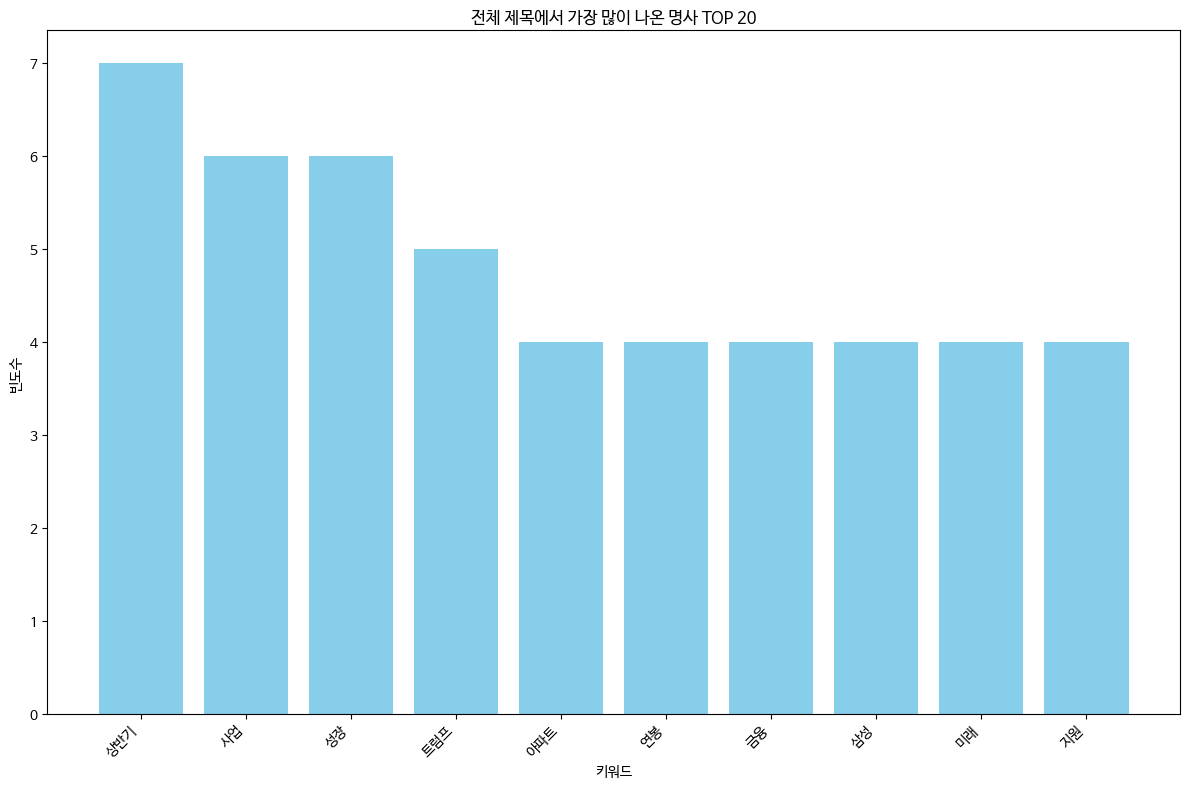

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
from collections import Counter

# 시스템에 설치된 한글 폰트 설정 (Windows: Malgun Gothic, macOS: AppleGothic)
# 사용자의 환경에 맞는 폰트 이름을 지정해야 한다.
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] = False # 마이너스 부호 깨짐 방지

print(f"식별된 키워드 : {len(all_words)}개")
# 빈도수가 높은 순으로 정렬
sorted_word_counts = sorted(word_counts.most_common(10), key=lambda item: item[1], reverse=True)

# 시각화를 위해 단어와 빈도수를 분리
keywords = [item[0] for item in sorted_word_counts]
counts = [item[1] for item in sorted_word_counts]

# 막대 그래프 생성
plt.figure(figsize=(12, 8))
plt.bar(keywords, counts, color='skyblue')
plt.xlabel('키워드')
plt.ylabel('빈도수')
plt.title('전체 제목에서 가장 많이 나온 명사 TOP 20')
plt.xticks(rotation=45, ha='right') # x축 라벨 회전
plt.tight_layout() # 그래프 레이아웃 조정

# 그래프 이미지 파일로 저장
plt.savefig('top_20_keywords.png')

## [문제상황]
앞서 토큰화를 통해 가장 많이 도출된 키워드는 상반기, 사업, 성장, 트럼프, 아파트, 연봉, 금융 등이다.
<br>
그러나 위 데이터를 이용해 현재 경제를 이해할 수 없다.

재테크를 위해서는 상반기에 무슨 일이 있었는지, 트럼프가 금융 시장에 어떤 영향을 미쳤는지, <br> 아파트 가격이 성장했다는 것인지와 같이 **단어와 단어가 결합된 맥락(Context)**을 알아야 한다.


## N-gram을 이용한 상관 관계 분석.


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# 이전 단계에서 정제된 토큰 리스트를 다시 문서(문자열) 형태로 변환
# cleaned_titles = [['상반기', '주식', '시장'], ['하반기', '아파트', '시장']]
documents = [' '.join(tokens) for tokens in cleaned_titles]

# Bi-gram을 추출하도록 CountVectorizer 설정
# ngram_range=(2, 2)는 토큰 2개로 구성된 N-gram만 사용하겠다는 의미
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigram_matrix = bigram_vectorizer.fit_transform(documents)

# DataFrame으로 변환하여 결과 확인
vocab_bigram = bigram_vectorizer.get_feature_names_out()
df_bigram = pd.DataFrame(bigram_matrix.toarray(), columns=vocab_bigram)

print("--- 생성된 Bi-gram 행렬 ---")
display(df_bigram[0:5])

--- 생성된 Bi-gram 행렬 ---


,가격 마이크론,가나 기재부,가전 전용,갈릭 버거,강판 상계관세,개미 매도,개발 검토,개방 교통,개월 작년,개월 최저,...,확장 시동,환도 당일,활동 전개,활용 신용,회복 개미,회복 지속,회사 지옥,회사 지원,회전 율도,희토류 재고
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# 'documents' 변수에는 정제된 텍스트 문서들의 리스트가 담겨있다
# 예: ['상반기 주식 시장', '하반기 아파트 시장']
print(len(documents))
print(documents[0])

100
마피 광명 아파트 보류 부동산


## 특정 키워드와 관계 깊은 단어 찾기 (상관관계 분석)
이제 특정 단어(예: '트럼프')가 등장할 때, 어떤 다른 단어들이 같은 문서에 함께 등장하는 경향이 있는지 분석한다. <br>
이를 위해 **상관관계 분석(Correlation Analysis)**을 사용한다.

> 동시 출현 (Co-occurrence) 기반의 관계.

| 문서 | 트럼프 | 관세 | 바이든 | 아파트 |
| --- | --- | --- | --- | --- |
| **뉴스1** | 1 | 1 | 0 | 0 |
| **뉴스2** | 1 | 1 | 0 | 0 |
| **뉴스3** | 0 | 0 | 1 | 1 |
| **뉴스4** | 1 | 0 | 0 | 1 |

- '트럼프'의 패턴: [1, 1, 0, 1]
- '관세'의 패턴: [1, 1, 0, 0]
- '아파트'의 패턴: [0, 0, 1, 1]

### corr 연산 방식: 예시로 이해하기
`pandas.DataFrame.corr()` 메서드는 다음의 피어슨 상관계수 공식을 각 쌍에 대해 적용하여 연산을 수행한다.

$$r_{XY} = \frac{\text{Cov}(X,Y)}{\sigma_X \sigma_Y}$$

*   **Cov(X,Y)**: X와 Y의 공분산 (Covariance)
*   **$\sigma_X$**: X의 표준편차 (Standard Deviation)
*   **$\sigma_Y$**: Y의 표준편차 (Standard Deviation)


#### 1. 예시 데이터 (`df`)
예시 데이터 `df_unigram`의 'A'와 'B' 단어에 대한 상관관계를 직접 계산.

|     | A | B | C |
|:----|:-:|:-:|:-:|
| doc1 | 1 | 1 | 0 |
| doc2 | 1 | 0 | 1 |
| doc3 | 0 | 1 | 1 |

1. 값의 대한 평균과 표준편차 계산
- A와 B의 평균 계산:

$$\mu_A=(1+1+0)/3 \approx 0.667$$
$$\mu_B=(1+0+1)/3 \approx 0.667$$

- A와 B의 표준편차 계산:
$$\sigma_A \approx 0.577$$
$$\sigma_B \approx 0.577$$


2. 공분산 계산
공분산은 두 변수가 함께 변하는 정도를 나타낸다.

$$\text{Cov}(A,B) = \frac{(1-0.667)(1-0.667) + (1-0.667)(0-0.667) + (0-0.667)(1-0.667)}{3} \approx -0.111$$

3. 상관계수 계산

계산된 값들을 공식에 대입합니다.

$$r_{AB} = \frac{-0.111}{0.577 \times 0.577} \approx -0.333$$


In [ ]:
# --- 1. Uni-gram DTM(문서-단어 행렬) 생성 ---

# 단어 1개(Uni-gram) 단위로 단어 사전을 만들고 빈도를 측정할 CountVectorizer 객체를 생성한다.
unigram_vectorizer = CountVectorizer(ngram_range=(1, 1))

# documents 데이터를 학습(fit)하여 단어 사전을 구축하고, 이를 기반으로 DTM(unigram_matrix)을 생성(transform)
unigram_matrix = unigram_vectorizer.fit_transform(documents)

# DTM의 열(column) 이름으로 사용할 단어 목록(Vocabulary)을 가져온다.
vocab_unigram = unigram_vectorizer.get_feature_names_out()

# 희소 행렬 형태의 DTM을 사람이 보기 편한 pandas DataFrame으로 변환.
# 각 열은 단어를, 행은 문서를, 값은 해당 문서에서의 단어 빈도를 나타낸다.
df_unigram = pd.DataFrame(unigram_matrix.toarray(), columns=vocab_unigram)

# 생성된 DTM DataFrame의 상위 5개 행을 확인.
display(df_unigram.head(5))


# --- 2. 단어 간 상관관계 행렬 계산 ---
# DTM의 각 열(단어) 간의 상관관계를 계산하여 새로운 행렬(corr_matrix)을 생성한다.
# 이를 통해 어떤 단어들이 같은 문서에 함께 등장하는 경향이 있는지 파악할 수 있다.

# .corr : 피어슨 상관계수
# - DTM(문서-단어 행렬)에 적용하면 각 단어(열)가 문서에 함께 나타나는 경향성을 수치로 보여준다
corr_matrix = df_unigram.corr()


# 생성된 상관관계 행렬의 첫 번째 행만 확인한다. (첫 번째 단어와 다른 모든 단어 간의 상관관계)
display(corr_matrix[0:1])

,가격,가나,가능성,가장,가전,갈릭,감소,강판,강화,개미,...,확대,확장,환도,활동,활용,회복,회사,회전,후퇴,희토류
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,가격,가나,가능성,가장,가전,갈릭,감소,강판,강화,개미,...,확대,확장,환도,활동,활용,회복,회사,회전,후퇴,희토류
가격,1.0,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,...,-0.010101,-0.010101,-0.010101,-0.010101,-0.010101,-0.017675,-0.016636,-0.010101,-0.010101,-0.010101


In [ ]:
# 3. 특정 키워드와 관계 깊은 단어 찾기
keyword = '트럼프'

# 상관관계 행렬에서 '주식' 열을 선택하고, 내림차순으로 정렬
correlated_words = corr_matrix[keyword].sort_values(ascending=False)

print(f"\n--- 키워드 '{keyword}'와(과) 관계 깊은 단어 TOP 5 ---")
# 자기 자신(상관계수 1)을 제외하고 상위 5개 출력
display(correlated_words[1:11].to_frame(name='상관계수'))


--- 키워드 '트럼프'와(과) 관계 깊은 단어 TOP 5 ---


,상관계수
인수,0.889757
인텔,0.889757
검토,0.655610
정부,0.622700
경영,0.622700
행정부,0.622700
일부,0.622700
추진,0.438086
블룸버그,0.438086
벼랑,0.438086
